### Example of how to manually align 2p reference images to a widefield reference. 

In [1]:
%matplotlib notebook
import pylab as plt
from wfield import *
import numpy as np
from tifffile import imread

/opt/conda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


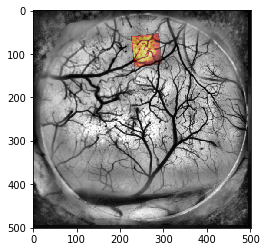

In [6]:
# Get the references and does the manual fit
refim = imread('/home/joao/tmp/190124_JC093_1P_JC/20190124_run001_00000000.tif').mean(axis=0).astype('uint16')
fitim = imread('/home/joao/tmp/190124_JC092_1P_JC/ref000_plane001_zero_reference_mag_1.7.tif')

fitim = fitim.squeeze()
fitim = estimate_sbx_lost_lines(fitim)

fitpar_guess = {'refh': 501,
 'refw': 502,
 'rotation': 6,
 'scale': 0.10228085212245784,
 'ratio': 1.2443285533709707,
 'origin': [54.04900165646944, 226.46029662516605]}
plt.figure()
fitpar = manual_overlay_image(im_adapt_hist(refim),
                              im_adapt_hist(fitim),
                              fitpar_guess)

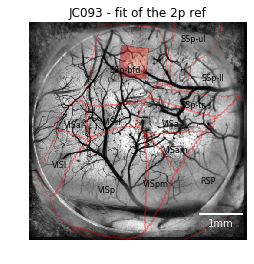

In [7]:
%matplotlib inline
refim = imread('/home/joao/tmp/190124_JC093_1P_JC/20190124_run001_00000000.tif').mean(axis=0).astype('uint16')
fitim = imread('/home/joao/tmp/190124_JC092_1P_JC/ref000_plane001_zero_reference_mag_1.7.tif')

fitim = fitim.squeeze()
fitim = estimate_sbx_lost_lines(fitim)
fitpar = {'refh': 501,
 'refw': 502,
 'rotation': 6,
 'scale': 0.10228085212245784,
 'ratio': 1.2443285533709707,
 'origin': [54.04900165646944, 226.46029662516605]}
res = adjust_to_reference(im_adapt_hist(fitim,0.02),**fitpar)

# Overlay the allen borders
resmanual = {'circlepar': (247.71912462483408, 255.51736005535133, 238.33858166523842), 
             'resolution': 0.010482180293501049,
             'points': [[258, 17], [10, 254], [218, 493], [401, 437]]}
refpar = {'translation': np.array([-0.45454474,  0.36784667]), 'rotation': 30, 'scale': 1.115631559121}

from wfield.allen import load_refregions
refregions = load_refregions()
extent = imshow_window(refim,resmanual,plot = False)
nrefregions = adjust_allen_areas(refregions,**refpar)

# Plot of the overlays
plt.figure()
plt.imshow(im_adapt_hist(refim[:,::-1]),extent=extent,cmap = 'gray')
plt.imshow(res[:,::-1],extent = extent,cmap = 'Reds_r',alpha = 0.5)

[p,t] = plot_allen_areas(nrefregions,color = 'r',lw = 0.3)
plt.axis(extent)
plt.axis('off')
plt.plot([1.5,2.5],[2,2],'w',lw = 2)
plt.text(2,2.1,'1mm',color = 'w',ha='center',va = 'top')
plt.title('JC093 - fit of the 2p ref');